In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_file = r'C:\Users\jerom\Machine Learning\Lab Ex 1\House_Rent_Dataset.csv'
data = pd.read_csv(csv_file)
data.head(10)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
5,2022-04-29,2,7000,600,Ground out of 1,Super Area,Thakurpukur,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
6,2022-06-21,2,10000,700,Ground out of 4,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,2,Contact Agent
7,2022-06-21,1,5000,250,1 out of 2,Super Area,Malancha,Kolkata,Unfurnished,Bachelors,1,Contact Agent
8,2022-06-07,2,26000,800,1 out of 2,Carpet Area,"Palm Avenue Kolkata, Ballygunge",Kolkata,Unfurnished,Bachelors,2,Contact Agent
9,2022-06-20,2,10000,1000,1 out of 3,Carpet Area,Natunhat,Kolkata,Semi-Furnished,Bachelors/Family,2,Contact Owner


# Preprocessing

#### Dropping Irrelevant Features

In [3]:
data = data.drop('Posted On', axis=1)
#data = data.drop('Area Locality', axis=1)
data = data.drop('Point of Contact', axis=1)


print("\nAfter dropping 'Posted On' column:")
print(data)


After dropping 'Posted On' column:
      BHK   Rent  Size            Floor    Area Type  \
0       2  10000  1100  Ground out of 2   Super Area   
1       2  20000   800       1 out of 3   Super Area   
2       2  17000  1000       1 out of 3   Super Area   
3       2  10000   800       1 out of 2   Super Area   
4       2   7500   850       1 out of 2  Carpet Area   
...   ...    ...   ...              ...          ...   
4741    2  15000  1000       3 out of 5  Carpet Area   
4742    3  29000  2000       1 out of 4   Super Area   
4743    3  35000  1750       3 out of 5  Carpet Area   
4744    3  45000  1500     23 out of 34  Carpet Area   
4745    2  15000  1000       4 out of 5  Carpet Area   

                 Area Locality       City Furnishing Status  Tenant Preferred  \
0                       Bandel    Kolkata       Unfurnished  Bachelors/Family   
1     Phool Bagan, Kankurgachi    Kolkata    Semi-Furnished  Bachelors/Family   
2      Salt Lake City Sector 2    Kolkata    Sem

#### Fixing Floors Format

In [4]:
data.at[105, 'Floor'] = '5 out of 8'
data.at[161, 'Floor'] = '1 out of 2'

In [5]:
data.iloc[105]

BHK                                  1
Rent                              6000
Size                               600
Floor                       5 out of 8
Area Type                  Carpet Area
Area Locality        Pratiraksha Nagar
City                           Kolkata
Furnishing Status          Unfurnished
Tenant Preferred      Bachelors/Family
Bathroom                             1
Name: 105, dtype: object

In [6]:
data.iloc[161]

BHK                                 2
Rent                            10000
Size                              450
Floor                      1 out of 2
Area Type                 Carpet Area
Area Locality                  Behala
City                          Kolkata
Furnishing Status      Semi-Furnished
Tenant Preferred     Bachelors/Family
Bathroom                            2
Name: 161, dtype: object

In [7]:
for index, floor_value in enumerate(data["Floor"]):
    if "Upper Basement" in floor_value:
        data.at[index, 'Floor'] = floor_value.replace("Upper Basement", "-1")
    elif "Lower Basement" in floor_value:
        data.at[index, 'Floor'] = floor_value.replace("Lower Basement", "-2")
    elif "Ground out" in floor_value:
        data.at[index, 'Floor'] = floor_value.replace("Ground", "1")
    elif floor_value == "Ground":
        data.at[index, 'Floor'] = floor_value.replace("Ground", "1 out of 1")
    elif floor_value == "1":
        data.at[index, 'Floor'] = floor_value.replace("1", "1 out of 1")
    elif floor_value == "3":
         data.at[index, 'Floor'] = floor_value.replace("3", "3 out of 3")
    else:
        data.at[index, 'Floor'] = floor_value
data

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,1 out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2
4742,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3
4743,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3
4744,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2


In [8]:
pattern = r'^-?\d+ out of \d+$'

matches_pattern = data['Floor'].str.match(pattern)
records_not_following_pattern = data[~matches_pattern]

# Print all unique values of 'Floor' for records that don't follow the pattern
unique_values_not_following_pattern = records_not_following_pattern['Floor'].unique()
print(unique_values_not_following_pattern)

[]


In [9]:
data['Floor'].value_counts()

Floor
1 out of 2      730
1 out of 3      502
1 out of 1      332
1 out of 4      315
2 out of 3      312
               ... 
5 out of 21       1
32 out of 59      1
20 out of 32      1
10 out of 37      1
23 out of 34      1
Name: count, Length: 460, dtype: int64

In [10]:
# Define a function to perform the conversion
def convert_floor(row):
    # Split the string into two parts based on "out of"
    numbers = row.split(" out of ")
    
    # Convert the two parts to integers
    room_floor = int(numbers[0])
    total_floor = int(numbers[1])
    
    # Perform the division and convert to a double
    floor = round(room_floor / total_floor, 4)
    
    return floor

# Apply the function to the entire 'Floor' column
data['Floor'] = data['Floor'].apply(convert_floor)

# Print the updated DataFrame
print(data)

      BHK   Rent  Size   Floor    Area Type             Area Locality  \
0       2  10000  1100  0.5000   Super Area                    Bandel   
1       2  20000   800  0.3333   Super Area  Phool Bagan, Kankurgachi   
2       2  17000  1000  0.3333   Super Area   Salt Lake City Sector 2   
3       2  10000   800  0.5000   Super Area               Dumdum Park   
4       2   7500   850  0.5000  Carpet Area             South Dum Dum   
...   ...    ...   ...     ...          ...                       ...   
4741    2  15000  1000  0.6000  Carpet Area              Bandam Kommu   
4742    3  29000  2000  0.2500   Super Area      Manikonda, Hyderabad   
4743    3  35000  1750  0.6000  Carpet Area      Himayath Nagar, NH 7   
4744    3  45000  1500  0.6765  Carpet Area                Gachibowli   
4745    2  15000  1000  0.8000  Carpet Area           Suchitra Circle   

           City Furnishing Status  Tenant Preferred  Bathroom  
0       Kolkata       Unfurnished  Bachelors/Family        

In [11]:
data['Floor'].describe()

count    4746.000000
mean        0.555319
std         0.270375
min        -2.000000
25%         0.333300
50%         0.500000
75%         0.750000
max         1.000000
Name: Floor, dtype: float64

In [12]:
data

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom
0,2,10000,1100,0.5000,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2
1,2,20000,800,0.3333,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1
2,2,17000,1000,0.3333,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1
3,2,10000,800,0.5000,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1
4,2,7500,850,0.5000,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,0.6000,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2
4742,3,29000,2000,0.2500,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3
4743,3,35000,1750,0.6000,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3
4744,3,45000,1500,0.6765,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2


#### Removal of Outliers in Rent Using IQR

In [13]:
def outliers(data, ft):
    q1 = data[ft].quantile(0.25)
    q3 = data[ft].quantile(0.75)
    iqr = q3 - q1

    lower_bnd = q1 - 1.5 * iqr  
    upper_bnd = q3 + 1.5 * iqr  
    ls = data.index[(data[ft] < lower_bnd) | (data[ft] > upper_bnd)]  # Corrected variable names
    return ls

index_list = []
for feature in ['Rent']:
    index_list.extend(outliers(data, feature))

num_outliers = len(index_list)
print("Number of outliers:", num_outliers)

Number of outliers: 520


In [14]:
def remove (data, ls):
    ls = sorted(set(ls))
    data = data.drop(ls)
    return data
    
data = remove(data, index_list)
data.shape

(4226, 10)

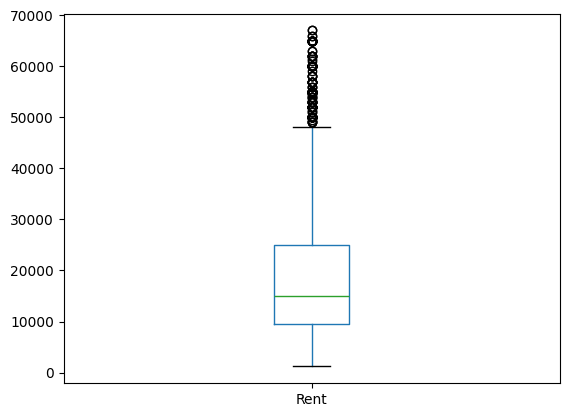

In [15]:
#Outlier Detection Using Boxplot
def plot_boxplot(data,ft):
    data.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

plot_boxplot(data, "Rent")

#### Target Encoding of Area Locality

In [16]:
mean_encoded = data.groupby('Area Locality')['Rent'].mean()
data['area_locality_encoded'] = data['Area Locality'].map(mean_encoded)

In [17]:
data = data.drop('Area Locality', axis=1)
data

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,area_locality_encoded
0,2,10000,1100,0.5000,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,8250.000000
1,2,20000,800,0.3333,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,11750.000000
2,2,17000,1000,0.3333,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,23187.500000
3,2,10000,800,0.5000,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,16000.000000
4,2,7500,850,0.5000,Carpet Area,Kolkata,Unfurnished,Bachelors,1,7500.000000
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,0.6000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,15750.000000
4742,3,29000,2000,0.2500,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,29000.000000
4743,3,35000,1750,0.6000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,30555.555556
4744,3,45000,1500,0.6765,Carpet Area,Hyderabad,Semi-Furnished,Family,2,42053.571429


#### One-hot Encoding of Categorical Features

In [18]:
data

,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,area_locality_encoded
0,2,10000,1100,0.5000,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,8250.000000
1,2,20000,800,0.3333,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,11750.000000
2,2,17000,1000,0.3333,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,23187.500000
3,2,10000,800,0.5000,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,16000.000000
4,2,7500,850,0.5000,Carpet Area,Kolkata,Unfurnished,Bachelors,1,7500.000000
...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,0.6000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,2,15750.000000
4742,3,29000,2000,0.2500,Super Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,29000.000000
4743,3,35000,1750,0.6000,Carpet Area,Hyderabad,Semi-Furnished,Bachelors/Family,3,30555.555556
4744,3,45000,1500,0.6765,Carpet Area,Hyderabad,Semi-Furnished,Family,2,42053.571429


In [19]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True)
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [20]:
data = one_hot_encode(data, 'Furnishing Status')
data = one_hot_encode(data, 'Area Type')
data = one_hot_encode(data, 'City')
data = one_hot_encode(data, 'Tenant Preferred')

In [21]:
data

,BHK,Rent,Size,Floor,Bathroom,area_locality_encoded,Semi-Furnished,Unfurnished,Carpet Area,Super Area,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Bachelors/Family,Family
0,2,10000,1100,0.5000,2,8250.000000,False,True,False,True,False,False,False,True,False,True,False
1,2,20000,800,0.3333,1,11750.000000,True,False,False,True,False,False,False,True,False,True,False
2,2,17000,1000,0.3333,1,23187.500000,True,False,False,True,False,False,False,True,False,True,False
3,2,10000,800,0.5000,1,16000.000000,False,True,False,True,False,False,False,True,False,True,False
4,2,7500,850,0.5000,1,7500.000000,False,True,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,0.6000,2,15750.000000,True,False,True,False,False,False,True,False,False,True,False
4742,3,29000,2000,0.2500,3,29000.000000,True,False,False,True,False,False,True,False,False,True,False
4743,3,35000,1750,0.6000,3,30555.555556,True,False,True,False,False,False,True,False,False,True,False
4744,3,45000,1500,0.6765,2,42053.571429,True,False,True,False,False,False,True,False,False,False,True


### Training and Test Split

In [22]:
X = data.drop('Rent', axis= 1)
y = data['Rent']

In [23]:
X

,BHK,Size,Floor,Bathroom,area_locality_encoded,Semi-Furnished,Unfurnished,Carpet Area,Super Area,Chennai,Delhi,Hyderabad,Kolkata,Mumbai,Bachelors/Family,Family
0,2,1100,0.5000,2,8250.000000,False,True,False,True,False,False,False,True,False,True,False
1,2,800,0.3333,1,11750.000000,True,False,False,True,False,False,False,True,False,True,False
2,2,1000,0.3333,1,23187.500000,True,False,False,True,False,False,False,True,False,True,False
3,2,800,0.5000,1,16000.000000,False,True,False,True,False,False,False,True,False,True,False
4,2,850,0.5000,1,7500.000000,False,True,True,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,1000,0.6000,2,15750.000000,True,False,True,False,False,False,True,False,False,True,False
4742,3,2000,0.2500,3,29000.000000,True,False,False,True,False,False,True,False,False,True,False
4743,3,1750,0.6000,3,30555.555556,True,False,True,False,False,False,True,False,False,True,False
4744,3,1500,0.6765,2,42053.571429,True,False,True,False,False,False,True,False,False,False,True


In [24]:
y

0       10000
1       20000
2       17000
3       10000
4        7500
        ...  
4741    15000
4742    29000
4743    35000
4744    45000
4745    15000
Name: Rent, Length: 4226, dtype: int64

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)

### Standardizing the Values

In [26]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modelling

#### Linear Reg

In [27]:
from sklearn import linear_model

# Assuming X_train is your training feature matrix and y_train is the corresponding target variable

# Create and fit the linear regression model
model = linear_model.LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients
model_coefficients = model.coef_
print("Linear Reg Coef")
# Print the coefficients along with feature index
for idx, coef in enumerate(model_coefficients):
    print(f"Feature {idx}: {coef}")


Linear Reg Coef
Feature 0: 1442.506286569232
Feature 1: 2475.398620686677
Feature 2: -260.11875139809615
Feature 3: 1028.0229529878582
Feature 4: 9342.201679109443
Feature 5: -914.720299212902
Feature 6: -944.4838187335099
Feature 7: -2136.7805089430876
Feature 8: -2725.6615346026765
Feature 9: -404.59275636114734
Feature 10: 342.103223456387
Feature 11: -814.2661027326309
Feature 12: -141.59237825453602
Feature 13: 2110.9477293488926
Feature 14: -299.1769431308458
Feature 15: -347.04884518689727


In [28]:
model.score(X_test, y_test)

0.8634859636204187

In [29]:
model.score(X_train, y_train)

0.8571584121025226

### Regularization

#### Linear Reg Lasso

In [30]:
from sklearn import linear_model

lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(X_train, y_train)
lasso_reg.coef_

# Get the coefficients
lasso_reg_coefficients = lasso_reg.coef_
print("Lasso Regularization Coef")
# Print the coefficients along with feature index
for idx, coef in enumerate(lasso_reg_coefficients):
    print(f"Feature {idx}: {coef}")

Lasso Regularization Coef
Feature 0: 1492.2365691038503
Feature 1: 2166.5280836381935
Feature 2: -190.38610332739455
Feature 3: 1142.3573023544316
Feature 4: 9395.838230787527
Feature 5: -488.54182999430776
Feature 6: -539.2325416645392
Feature 7: 570.7464508305396
Feature 8: -12.518058954982427
Feature 9: -593.6148490368171
Feature 10: 115.49602885255645
Feature 11: -902.2861061988531
Feature 12: -209.3060565668243
Feature 13: 1898.7606554752306
Feature 14: -203.88778039611725
Feature 15: -227.8969902504141


In [31]:
lasso_reg.score(X_test, y_test)

0.8638267483136176

In [32]:
lasso_reg.score(X_train, y_train)

0.8562448129111423

#### Ridge

In [33]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(X_train, y_train)


# Get the coefficients
ridge_reg_coefficients = ridge_reg.coef_

print("Ridge Regularization Coef")
# Print the coefficients along with feature index
for idx, coef in enumerate(ridge_reg_coefficients):
    print(f"Feature {idx}: {coef}")

Ridge Regularization Coef
Feature 0: 1447.9235675305308
Feature 1: 2449.744412852406
Feature 2: -264.11278038062073
Feature 3: 1088.1891871059745
Feature 4: 9127.7757271024
Feature 5: -877.0320490290517
Feature 6: -923.3135777107831
Feature 7: 220.06257081424687
Feature 8: -404.145990235343
Feature 9: -415.5653419462454
Feature 10: 339.67123328904813
Feature 11: -810.7040213836244
Feature 12: -169.3828071462081
Feature 13: 2184.908776527672
Feature 14: -296.61412321348945
Feature 15: -339.7185479721838


In [34]:
ridge_reg.score(X_test, y_test)

0.8638490829176272

In [35]:
ridge_reg.score(X_train, y_train)

0.8569837636319938

#### Plotting Coefficients for each model

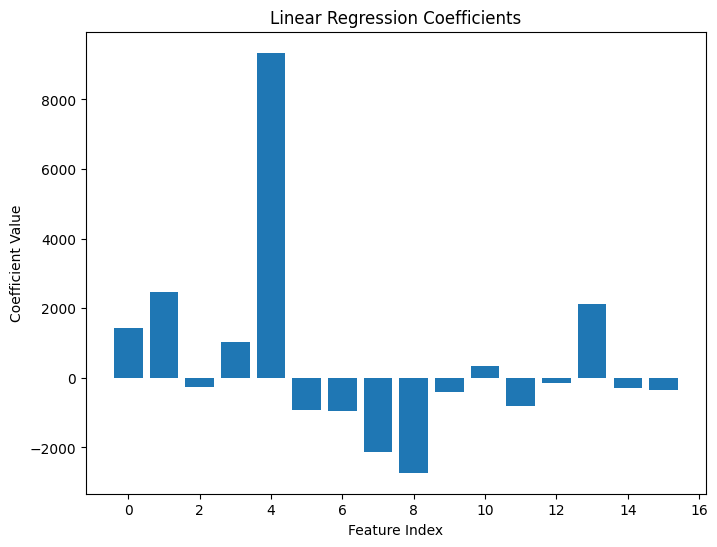

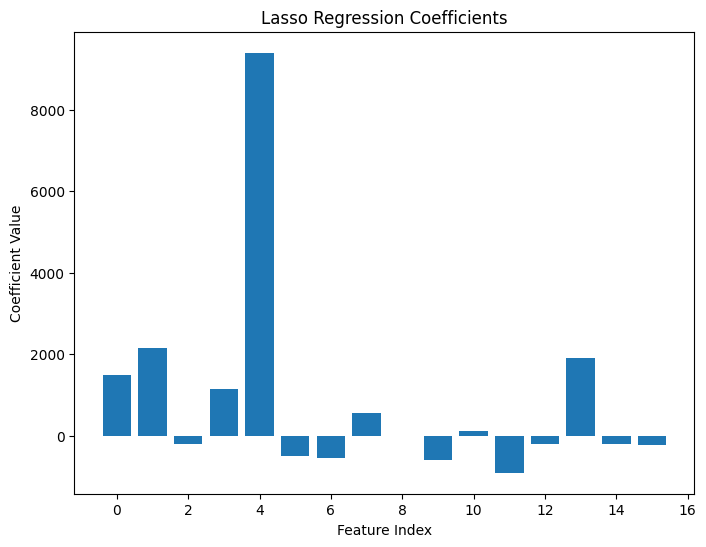

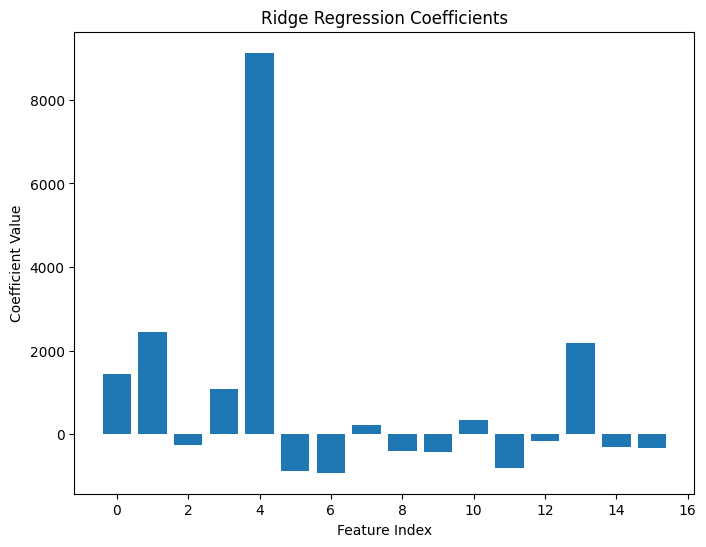

In [36]:
# Plot the Linear Reg coefficients
plt.figure(figsize=(8, 6))
plt.bar(range(len(model_coefficients)), model_coefficients)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.show()

# Plot the Lasso coefficients
plt.figure(figsize=(8, 6))
plt.bar(range(len(lasso_reg_coefficients)), lasso_reg_coefficients)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')
plt.show()

# Plot the Ridge coefficients
plt.figure(figsize=(8, 6))
plt.bar(range(len(ridge_reg_coefficients)), ridge_reg_coefficients)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients')
plt.show()


### Evaluation

#### Quantitative Evaluation For Lin Reg

In [37]:
y_preds = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficients: 
 [ 1442.50628657  2475.39862069  -260.1187514   1028.02295299
  9342.20167911  -914.72029921  -944.48381873 -2136.78050894
 -2725.6615346   -404.59275636   342.10322346  -814.26610273
  -141.59237825  2110.94772935  -299.17694313  -347.04884519]
Mean squared error: 26175406.20
Coefficient of determination: 0.86


#### Quantitative Evaluation For lasso

In [38]:
y_preds = lasso_reg.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Coefficients: \n", lasso_reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficients: 
 [1492.2365691  2166.52808364 -190.38610333 1142.35730235 9395.83823079
 -488.54182999 -539.23254166  570.74645083  -12.51805895 -593.61484904
  115.49602885 -902.2861062  -209.30605657 1898.76065548 -203.8877804
 -227.89699025]
Mean squared error: 26110063.63
Coefficient of determination: 0.86


#### Quantitative Evaluation For ridge

In [39]:
y_preds = ridge_reg.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print("Coefficients: \n", ridge_reg.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_preds))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_preds))

Coefficients: 
 [1447.92356753 2449.74441285 -264.11278038 1088.18918711 9127.7757271
 -877.03204903 -923.31357771  220.06257081 -404.14599024 -415.56534195
  339.67123329 -810.70402138 -169.38280715 2184.90877653 -296.61412321
 -339.71854797]
Mean squared error: 26105781.16
Coefficient of determination: 0.86


## Qualitative Evaluation

In [40]:
sample_data = X.iloc[0]
sample_data

BHK                           2
Size                       1100
Floor                       0.5
Bathroom                      2
area_locality_encoded    8250.0
Semi-Furnished            False
Unfurnished                True
Carpet Area               False
Super Area                 True
Chennai                   False
Delhi                     False
Hyderabad                 False
Kolkata                    True
Mumbai                    False
Bachelors/Family           True
Family                    False
Name: 0, dtype: object

In [41]:
sample_data_standardized = sc.transform(X.iloc[0].values.reshape(1,-1))

C:\Users\jerom\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [42]:
model_rent_forecast = model.predict(sample_data_standardized)[0]
print("Predicted Price")
model_rent_forecast

Predicted Price


10776.517110116414

In [43]:
print("Actual Price:")
y.iloc[0]

Actual Price:


10000